In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re


In [2]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
df = pd.read_csv("/content/user_reviews.csv")
df.head()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [5]:
df.dropna(subset=["Translated_Review"], inplace=True)

stopwords_list = stopwords.words("english")
stemmer = PorterStemmer()

def clean_text(text):
    text = re.sub(r"[^a-zA-Z ]", "", text)
    text = text.lower()
    words = text.split()
    words = [stemmer.stem(w) for w in words if w not in stopwords_list]
    return " ".join(words)

df["clean_review"] = df["Translated_Review"].apply(clean_text)
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,clean_review
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,like eat delici food that im cook food case be...
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,help eat healthi exercis regular basi
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,work great especi go groceri store
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,best idea us
5,10 Best Foods for You,Best way,Positive,1.00,0.300000,best way


In [7]:
from textblob import TextBlob

def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df["sentiment"] = df["clean_review"].apply(get_sentiment)
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,clean_review,sentiment
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,like eat delici food that im cook food case be...,Positive
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,help eat healthi exercis regular basi,Neutral
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,work great especi go groceri store,Positive
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,best idea us,Positive
5,10 Best Foods for You,Best way,Positive,1.00,0.300000,best way,Positive


In [8]:
X = df["clean_review"]
y = df["sentiment"]

vectorizer = TfidfVectorizer()
X_vectors = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vectors, y, test_size=0.2, random_state=42)


In [9]:
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

Accuracy: 0.6289072936147475
              precision    recall  f1-score   support

    Negative       0.96      0.17      0.29      1424
     Neutral       0.96      0.15      0.26      1867
    Positive       0.60      1.00      0.75      4195

    accuracy                           0.63      7486
   macro avg       0.84      0.44      0.43      7486
weighted avg       0.76      0.63      0.54      7486



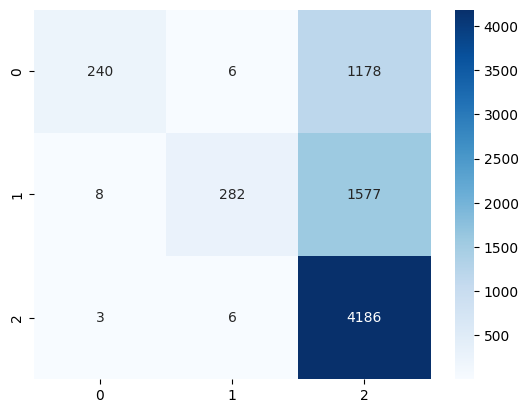

In [10]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.show()


In [11]:
df.to_csv("clean_sentiment_output.csv", index=False)
df.head()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,clean_review,sentiment
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,like eat delici food that im cook food case be...,Positive
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,help eat healthi exercis regular basi,Neutral
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,work great especi go groceri store,Positive
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,best idea us,Positive
5,10 Best Foods for You,Best way,Positive,1.00,0.300000,best way,Positive


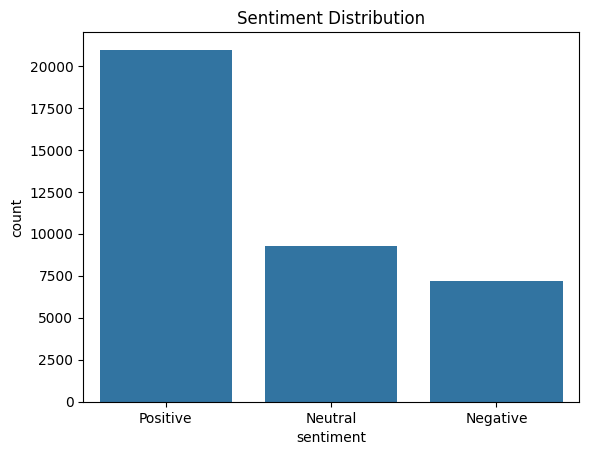

In [12]:
sns.countplot(data=df, x="sentiment")
plt.title("Sentiment Distribution")
plt.show()
